# Acceptance-Rejection-Method

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Acceptance-Rejection-Method
To sample from density f using candidate from density g

1. generate X from distribution g
2. generate U from Uniform distribution [0,1]
3. if U <= f(X)/cg(X):
        return X
   else: 
        back to step 1
   where c is to regulate the ratio f(x)/g(x)

#### Application: $N(mu,{sigma}^2)$

Since $X~N(mu, {sigma}^2)$ can be written as $X=sigmaZ+mu$, we just need to generate $N(0,1)$. Due to the symmetricity, we set $Z=|Z|$ if $U<=0.5$, $Z=-|Z|$ if $U>0.5$.  

$|Z|$ is distributed as 
    $f(x) = \frac{2}{\sqrt{2\pi}}e^{\frac{-x^2}{2}}$, $x>0$
    
We choose alternative distribution as 
    $g(x) = e^{-x}$, $x>=0$
    
Define $h(x) = \frac{f(x)}{cg(x)} = \frac{2}{\sqrt{2\pi}}e^{\frac{x-x^2}{2}}$, $x>0$.

It is obvious that $h_{max} = h(1)$ since to maximize $x-\frac{x^2}{2} = -\frac{1}{2}(-2x+x^2)$.

Thus we let $c = \frac{2e}{\sqrt{2\pi}} = 1.32$, and we can let $\frac{f(y)}{cg(y)} = e^{-\frac{(y-1)^2}{2}}$

#### Implementation 1

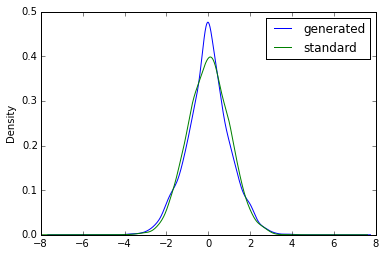

In [79]:
N = 5000
Z = []
for i_ in range(N):
    U = np.random.rand()
    Y = -np.log(U) 
    U = np.random.rand()
    while U > np.exp(-(Y-1)**2/2+1/2):
        U = np.random.rand()
        Y = -np.log(U)    
    Z_abs = Y
    U = np.random.rand()
    if U<=0.5:
        Z.append(Z_abs)
    else:
        Z.append(-Z_abs)
        
Z = np.array(Z).reshape((5000,1))

Z_std = np.random.randn(5000,1)
Z_std.shape, Z.shape

df = pd.DataFrame(np.hstack([Z, Z_std]), columns=['generated', 'standard'])
plt.figure()
df.plot(kind='kde')

pass

#### Implementation 2

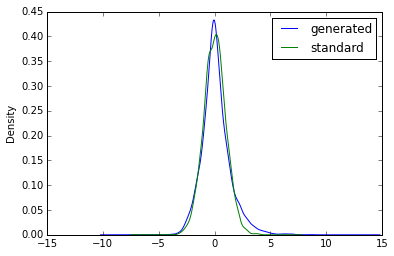

In [71]:
Z  = []
for i in range(N):
    U1 = np.random.rand()
    U2 = np.random.rand()
    Y1 = -np.log(U1)
    Y2 = -np.log(U2)
    while Y1 < (Y2-1)**2/2-1/2:
        U1 = np.random.rand()
        U2 = np.random.rand()
        Y1 = -np.log(U1)
        Y2 = -np.log(U2)
    U = np.random.rand()
    if U<=0.5:
        Z.append(Y1)
    else:
        Z.append(-Y2)

Z = np.array(Z).reshape((5000,1))

Z_std = np.random.randn(5000,1)
Z_std.shape, Z.shape
df = pd.DataFrame(np.hstack([Z, Z_std]), columns=['generated', 'standard'])


plt.figure(figsize=(20, 20*.618))
df.plot(kind='kde')

pass